## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0721 22:48:35.176347  3872 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 22:48:35.246158  3872 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 22:48:35.258126  3872 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.3321 - acc: 0.5280 - val_loss: 1.4012 - val_acc: 0.5062
Epoch 2/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.3141 - acc: 0.5331 - val_loss: 1.3936 - val_acc: 0.5085
Epoch 3/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.3073 - acc: 0.5358 - val_loss: 1.3900 - val_acc: 0.5091
Epoch 4/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.3031 - acc: 0.5362 - val_loss: 1.3872 - val_acc: 0.5080
Epoch 5/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.2999 - acc: 0.5378 - val_loss: 1.3852 - val_acc: 0.5089
Epoch 6/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.2976 - acc: 0.5383 - val_loss: 1.3838 - val_acc: 0.5081
Epoch 7/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.2955 - acc: 0.5400 - val_loss: 1.

50000/50000 [==============================] - 6s 118us/step - loss: 1.2618 - acc: 0.5520 - val_loss: 1.3672 - val_acc: 0.5187
Epoch 59/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2614 - acc: 0.5520 - val_loss: 1.3667 - val_acc: 0.5198
Epoch 60/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2610 - acc: 0.5516 - val_loss: 1.3666 - val_acc: 0.5190
Epoch 61/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2605 - acc: 0.5519 - val_loss: 1.3667 - val_acc: 0.5186
Epoch 62/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2601 - acc: 0.5528 - val_loss: 1.3663 - val_acc: 0.5195
Epoch 63/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.2597 - acc: 0.5526 - val_loss: 1.3661 - val_acc: 0.5192
Epoch 64/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.2593 - acc: 0.5525 - val_loss: 1.3663 - val_acc: 0.5180
Epoch 65/500
50000/50000 [=======

50000/50000 [==============================] - 6s 117us/step - loss: 1.2407 - acc: 0.5594 - val_loss: 1.3575 - val_acc: 0.5196
Epoch 117/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.2404 - acc: 0.5595 - val_loss: 1.3579 - val_acc: 0.5184
Epoch 118/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.2401 - acc: 0.5596 - val_loss: 1.3573 - val_acc: 0.5190
Epoch 119/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.2398 - acc: 0.5596 - val_loss: 1.3571 - val_acc: 0.5201
Epoch 120/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.2394 - acc: 0.5599 - val_loss: 1.3572 - val_acc: 0.5190
Epoch 121/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.2391 - acc: 0.5598 - val_loss: 1.3569 - val_acc: 0.5193
Epoch 122/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.2387 - acc: 0.5602 - val_loss: 1.3568 - val_acc: 0.5198
Epoch 123/500
50000/50000 [

50000/50000 [==============================] - 6s 117us/step - loss: 1.2224 - acc: 0.5660 - val_loss: 1.3500 - val_acc: 0.5217
Epoch 175/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.2221 - acc: 0.5665 - val_loss: 1.3501 - val_acc: 0.5233
Epoch 176/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.2218 - acc: 0.5666 - val_loss: 1.3505 - val_acc: 0.5209
Epoch 177/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.2216 - acc: 0.5672 - val_loss: 1.3499 - val_acc: 0.5213
Epoch 178/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.2213 - acc: 0.5662 - val_loss: 1.3498 - val_acc: 0.5230
Epoch 179/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.2209 - acc: 0.5663 - val_loss: 1.3496 - val_acc: 0.5213
Epoch 180/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.2206 - acc: 0.5669 - val_loss: 1.3497 - val_acc: 0.5212
Epoch 181/500
50000/50000 [

50000/50000 [==============================] - 6s 117us/step - loss: 1.2063 - acc: 0.5716 - val_loss: 1.3449 - val_acc: 0.5236
Epoch 233/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.2061 - acc: 0.5716 - val_loss: 1.3450 - val_acc: 0.5230
Epoch 234/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.2058 - acc: 0.5717 - val_loss: 1.3450 - val_acc: 0.5245
Epoch 235/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2054 - acc: 0.5714 - val_loss: 1.3445 - val_acc: 0.5236
Epoch 236/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2053 - acc: 0.5723 - val_loss: 1.3444 - val_acc: 0.5239
Epoch 237/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2050 - acc: 0.5721 - val_loss: 1.3450 - val_acc: 0.5225
Epoch 238/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.2048 - acc: 0.5723 - val_loss: 1.3444 - val_acc: 0.5246
Epoch 239/500
50000/50000 [

50000/50000 [==============================] - 7s 141us/step - loss: 1.1912 - acc: 0.5772 - val_loss: 1.3405 - val_acc: 0.5262
Epoch 291/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.1908 - acc: 0.5773 - val_loss: 1.3403 - val_acc: 0.5261
Epoch 292/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.1907 - acc: 0.5775 - val_loss: 1.3402 - val_acc: 0.5257
Epoch 293/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.1904 - acc: 0.5777 - val_loss: 1.3404 - val_acc: 0.5254
Epoch 294/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.1902 - acc: 0.5779 - val_loss: 1.3401 - val_acc: 0.5263
Epoch 295/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1899 - acc: 0.5779 - val_loss: 1.3403 - val_acc: 0.5264
Epoch 296/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.1897 - acc: 0.5773 - val_loss: 1.3401 - val_acc: 0.5252
Epoch 297/500
50000/50000 [

50000/50000 [==============================] - 6s 125us/step - loss: 1.1767 - acc: 0.5825 - val_loss: 1.3370 - val_acc: 0.5268
Epoch 349/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.1764 - acc: 0.5826 - val_loss: 1.3371 - val_acc: 0.5274
Epoch 350/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.1761 - acc: 0.5830 - val_loss: 1.3369 - val_acc: 0.5275
Epoch 351/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.1758 - acc: 0.5833 - val_loss: 1.3370 - val_acc: 0.5273
Epoch 352/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.1756 - acc: 0.5828 - val_loss: 1.3369 - val_acc: 0.5269
Epoch 353/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1754 - acc: 0.5835 - val_loss: 1.3368 - val_acc: 0.5276
Epoch 354/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.1752 - acc: 0.5832 - val_loss: 1.3366 - val_acc: 0.5275
Epoch 355/500
50000/50000 [

Epoch 406/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.1623 - acc: 0.5878 - val_loss: 1.3340 - val_acc: 0.5280
Epoch 407/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.1621 - acc: 0.5886 - val_loss: 1.3337 - val_acc: 0.5287
Epoch 408/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.1618 - acc: 0.5888 - val_loss: 1.3338 - val_acc: 0.5284
Epoch 409/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.1616 - acc: 0.5882 - val_loss: 1.3341 - val_acc: 0.5301
Epoch 410/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.1613 - acc: 0.5890 - val_loss: 1.3337 - val_acc: 0.5292
Epoch 411/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.1611 - acc: 0.5887 - val_loss: 1.3339 - val_acc: 0.5295
Epoch 412/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.1608 - acc: 0.5890 - val_loss: 1.3339 - val_acc: 0.5297
Epoch 413/500

50000/50000 [==============================] - 7s 131us/step - loss: 1.1485 - acc: 0.5930 - val_loss: 1.3315 - val_acc: 0.5302
Epoch 464/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.1482 - acc: 0.5947 - val_loss: 1.3315 - val_acc: 0.5317
Epoch 465/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.1480 - acc: 0.5942 - val_loss: 1.3316 - val_acc: 0.5302
Epoch 466/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.1476 - acc: 0.5943 - val_loss: 1.3320 - val_acc: 0.5308
Epoch 467/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.1475 - acc: 0.5950 - val_loss: 1.3317 - val_acc: 0.5315
Epoch 468/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.1472 - acc: 0.5940 - val_loss: 1.3314 - val_acc: 0.5321
Epoch 469/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.1470 - acc: 0.5945 - val_loss: 1.3317 - val_acc: 0.5297
Epoch 470/500
50000/50000 [

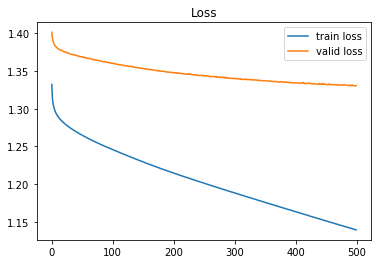

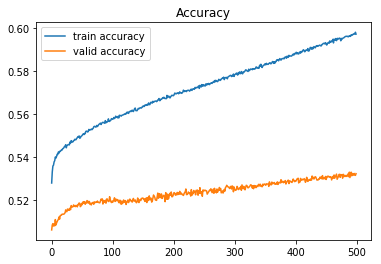

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()